# <center> TMVA Classification with Di-Higgs Dataset</center>

This notebook is a basic example for training and testing TMVA classifiers. 

## Declare Factory class

Create the Factory class. Later you can choose the methods
whose performance you'd like to investigate. 

The factory is the major TMVA object you have to interact with. Here is the list of parameters you need to pass

 - The first argument is the base of the name of all the output
weightfiles in the directory weight/ that will be created with the 
method parameters 

 - The second argument is the output file for the training results
  
 - The third argument is a string option defining some general configuration for the TMVA session. For example all TMVA output can be suppressed by removing the "!" (not) in front of the "Silent" argument in the option string

In [1]:
TMVA::Tools::Instance();

// Training and testing outcomes are stored in the output.root file, and can be displayed using macros.
auto outputFile = TFile::Open("TMVA_ClassificationOutput.root", "RECREATE");

TMVA::Factory factory("TMVAClassification", outputFile,
                      "!V:ROC:!Silent:Color:!DrawProgressBar:AnalysisType=Classification" ); 

## Define the input dataset

Define input data file consisting of signal and background trees

In [2]:
//TString inputFileName = "http://root.cern.ch/files/tmva_example.root";
// In this case, the signal is stored in the "RSG_C10_M500.root" file, 
// and the background in "ZtautauB_221.root","ZtautauC_221.root" and "ZtautauL_221.root" files.
TString inputFileNameS = "RSG_C10_M500.root"; // Signal file
TString inputFileNameB = "ZtautauB_221.root"; // Background file
TString inputFileNameC = "ZtautauC_221.root"; // Background file
TString inputFileNameL = "ZtautauL_221.root"; // Background file

auto inputFileS = TFile::Open( inputFileNameS );
auto inputFileB = TFile::Open( inputFileNameB );
auto inputFileC = TFile::Open( inputFileNameC );
auto inputFileL = TFile::Open( inputFileNameL );


// --- Register the training and test trees
// We use the "Nominal" tree of each file.
TTree *signalTree     = (TTree*)inputFileS->Get("Nominal");
TTree *backgroundTreeB = (TTree*)inputFileB->Get("Nominal");
TTree *backgroundTreeC = (TTree*)inputFileC->Get("Nominal");
TTree *backgroundTreeL = (TTree*)inputFileL->Get("Nominal");


## Create DataLoader class

The next step is to declare the DataLoader class which provides the interface from TMVA to the input data 


In [3]:
TMVA::DataLoader * loader = new TMVA::DataLoader("dataset");

In [4]:
// global event weights per tree (see below for setting event-wise weights).
Double_t signalWeight     = 1.0;
Double_t backgroundWeight = 1.0;
   
// You can add an arbitrary number of signal or background trees.
loader->AddSignalTree    ( signalTree,     signalWeight     );
loader->AddBackgroundTree( backgroundTreeB, backgroundWeight );
loader->AddBackgroundTree( backgroundTreeC, backgroundWeight );
loader->AddBackgroundTree( backgroundTreeL, backgroundWeight );


DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree Nominal of type Signal with 476 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree Nominal of type Background with 18 events
                         : Add Tree Nominal of type Background with 16 events
                         : Add Tree Nominal of type Background with 13 events


## Define input variables

Through the DataLoader we define the input variables that will be used for the MVA training.
Note that we can also use variable expressions, which can be parsed by *TTree::Draw( "expression" )*

In [5]:
signalTree->Print();

******************************************************************************
*Tree    :Nominal   : Nominal                                                *
*Entries :      476 : Total =          138479 bytes  File  Size =      79858 *
*        :          : Tree compression factor =   1.47                       *
******************************************************************************
*Br    0 :sample    : string                                                 *
*Entries :      476 : Total  Size=      14381 bytes  File Size  =       1075 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=  12.92     *
*............................................................................*
*Br    1 :EventWeight : EventWeight/F                                        *
*Entries :      476 : Total  Size=       2494 bytes  File Size  =       1787 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.11     *
*...................................................

In [6]:
backgroundTreeB->Print()

******************************************************************************
*Tree    :Nominal   : Nominal                                                *
*Entries :       18 : Total =           33183 bytes  File  Size =      10164 *
*        :          : Tree compression factor =   1.07                       *
******************************************************************************
*Br    0 :sample    : string                                                 *
*Entries :       18 : Total  Size=        685 bytes  File Size  =        142 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.35     *
*............................................................................*
*Br    1 :EventWeight : EventWeight/F                                        *
*Entries :       18 : Total  Size=        662 bytes  File Size  =        153 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [7]:
loader->AddVariable( "EventWeight", "EventWeight", "units", 'F' );
loader->AddVariable( "EventNumber", "EventNumber", "units", 'l' );
loader->AddVariable( "NJets", "NJets", "units", 'I' );
loader->AddVariable( "NJetsbtagged", "NJetsbtagged", "units", 'I' );
loader->AddVariable( "Tau1Pt", "Tau1Pt", "units", 'F' );
loader->AddVariable( "Tau1Eta", "Tau1Eta", "units", 'F' );
loader->AddVariable( "Tau1Phi", "Tau1Phi", "units", 'F' );
loader->AddVariable( "Tau2Pt", "Tau2Pt", "units", 'F' );
loader->AddVariable( "Tau2Eta", "Tau2Eta", "units", 'F' );
loader->AddVariable( "Tau2Phi", "Tau2Phi", "units", 'F' );
loader->AddVariable( "diTauVisM", "diTauVisM", "units", 'F' );
loader->AddVariable( "diTauVisPt", "diTauVisPt", "units", 'F' );
loader->AddVariable( "diTauVisEta", "diTauVisEta", "units", 'F' );
loader->AddVariable( "diTauVisPhi", "diTauVisPhi", "units", 'F' );
loader->AddVariable( "diTauMMCM", "diTauMMCM", "units", 'F' );
loader->AddVariable( "diTauMMCPt", "diTauMMCPt", "units", 'F' );
loader->AddVariable( "diTauMMCEta", "diTauMMCEta", "units", 'F' );
loader->AddVariable( "diTauMMCPhi", "diTauMMCPhi", "units", 'F' );
loader->AddVariable( "diTauDR", "diTauDR", "units", 'F' );
loader->AddVariable( "diTauDEta", "diTauDEta", "units", 'F' );
loader->AddVariable( "diTauDPhi", "diTauDPhi", "units", 'F' );
loader->AddVariable( "Jet1Pt", "Jet1Pt", "units", 'F' );
loader->AddVariable( "Jet1Eta", "Jet1Eta", "units", 'F' );
loader->AddVariable( "Jet1Phi", "Jet1Phi", "units", 'F' );
loader->AddVariable( "Jet1M", "Jet1M", "units", 'F' );
loader->AddVariable( "Jet2Pt", "Jet2Pt", "units", 'F' );
loader->AddVariable( "Jet2Eta", "Jet2Eta", "units", 'F' );
loader->AddVariable( "Jet2Phi", "Jet2Phi", "units", 'F' );
loader->AddVariable( "Jet2M", "Jet2M", "units", 'F' );
loader->AddVariable( "diJetM", "diJetM", "units", 'F' );
loader->AddVariable( "diJetPt", "diJetPt", "units", 'F' );
loader->AddVariable( "diJetEta", "diJetEta", "units", 'F' );
loader->AddVariable( "diJetPhi", "diJetPhi", "units", 'F' );
loader->AddVariable( "diJetDR", "diJetDR", "units", 'F' );
loader->AddVariable( "diJetDEta", "diJetDEta", "units", 'F' );
loader->AddVariable( "diJetDPhi", "diJetDPhi", "units", 'F' );
loader->AddVariable( "diHiggsMScaled", "diHiggsMScaled", "units", 'F' );
loader->AddVariable( "diHiggsM", "diHiggsM", "units", 'F' );
loader->AddVariable( "diHiggsPt", "diHiggsPt", "units", 'F' );
loader->AddVariable( "MTW_Max", "MTW_Max", "units", 'F' );
loader->AddVariable( "MTW_Clos", "MTW_Clos", "units", 'F' );
loader->AddVariable( "METCentrality", "METCentrality", "units", 'F' );
loader->AddVariable( "MET", "MET", "units", 'F' );

// You can add so-called "Spectator variables", which are not used in the MVA training,
// but will appear in the final "TestTree" produced by TMVA. This TestTree will contain the
// input variables, the response values of all trained MVAs, and the spectator variables
//loader->AddSpectator( "spec1 := var1*2",  "Spectator 1", "units", 'F' );
//loader->AddSpectator( "spec2 := var1*3",  "Spectator 2", "units", 'F' );


//  We can define also the event weights

// Set individual event weights (the variables must exist in the original TTree)
//    for signal    : factory->SetSignalWeightExpression    ("weight1*weight2");
//    for background: factory->SetBackgroundWeightExpression("weight1*weight2");
//loader->SetBackgroundWeightExpression( "weight" );


This dataset contains 476 signal events and 47 background events.

The variables (columns) are 43:
* EventWeight
* EventNumber
* NJets 
* NJetsbtagged
* Tau1Pt
* Tau1Eta
* Tau1Phi
* Tau2Pt
* Tau2Eta
* Tau2Phi
* diTauVisM
* diTauVisPt
* diTauVisEta
* diTauVisPhi
* diTauMMCM
* diTauMMCPt
* diTauMMCEta
* diTauMMCPhi
* diTauDR
* diTauDEta
* diTauDPhi
* Jet1Pt
* Jet1Eta
* Jet1Phi
* Jet1M
* Jet2Pt
* Jet2Eta
* Jet2Phi
* Jet2M
* diJetM
* diJetPt
* diJetEta
* diJetPhi
* diJetDR
* diJetDEta
* diJetDPhi
* diHiggsMScaled
* diHiggsM
* diHiggsPt
* MTW_Max
* MTW_Clos
* METCentrality
* MET

The next variables are constants and won't be included in the analysis:

* sample
* BDT
* Tau1M
* Tau2M
* DiJetDiTauDR
* DiJetDiTauDPhi
* BoostedDT

## Prepare data: split in training and test sample 

In [8]:
// Apply additional cuts on the signal and background samples (can be different)
TCut mycuts, mycutb; // for example: TCut mycuts = "abs(var1)<0.5 && abs(var2-0.5)<1";
// for example: TCut mycutb = "abs(var1)<0.5";

// Tell the factory how to use the training and testing events
//
// If no numbers of events are given, half of the events in the tree are used 
// for training, and the other half for testing:
//loader->PrepareTrainingAndTestTree(mycut, "SplitMode=random:!V");
// To also specify the number of testing events, use:
//    loader->PrepareTrainingAndTestTree( mycut,
//                                         "NSigTrain=3000:NBkgTrain=3000:NSigTest=3000:NBkgTest=3000:SplitMode=Random:!V" );
loader->PrepareTrainingAndTestTree( mycuts, mycutb,
                                    "nTrain_Signal=20:nTrain_Background=20:SplitMode=Random:NormMode=NumEvents:!V" );


We define the training dataset with 40 events; 20 of signal and 20 of background. The rest will be testing data. The *SplitMode=Random* command indicates events are **selected randomly**. The seed of the random generator can be set. With *SplitSeed=0* the generator returns a different random number series every time. The default seed of *100* ensures that the same training and test samples are used each time TMVA is run.

In some cases event weights are given by Monte Carlo generators, and may turn out to be overall very small or large numbers. To avoid artifacts due to this, TMVA can internally renormalise the signal and background training weights such that their respective sums of effective (weighted) events is equal. This is the default renormalisation and it can be modified with the configuration option *NormMode*. *NormMode=NumEvents* applies renormalisation of the training events such that the sum of event weights of the Signal and Background events,  respectively are equal to the number ofevents **Ns** and **Nb** requested in the call *Factory::PrepareTrainingAndTestTree*.

# Booking Classifiers Methods


We Book here the different MVA method we want to use. 
We specify the method using the appropriate enumeration, defined in *TMVA::Types*.
See the file *TMVA/Types.h* for all possible MVA methods available. 
In addition, we specify via an option string all the method parameters. For all possible options, default parameter values, see the corresponding documentation in the TMVA Users Guide. 

Note that with the booking one can also specify individual variable tranformations to be done before using the method.
For example *VarTransform=Decorrelate* will decorrelate the inputs.  

We define a **BDT** with the next hyper-parameters:
* 200 decision trees
* 2.5 as the least percentage of training events required for a leaf node.
* Maximum depth is 2 nodes.
* Boost type used is AdaBoost.
* Learning rate for AdaBoost is 0.5.
* Proportion of sub-sample size and total dataset size is 0.5.
* Split node criterion is Gini Index.
* 20 divisions on the variables values for finding the optimal cut.

And an **ANN** with the next hyper-parameters:
* Neuron activation function type is tanh.
* Neuron input normalization in range [-1,1].
* 100 training cycles.
* 1 hidden layer with N+5 neurons.
* 5 overtraining testings on each epoch.
* Use bayesian regulator for overtraining.

In [9]:
// Likelihood ("naive Bayes estimator")
//factory.BookMethod(loader, TMVA::Types::kLikelihood, "Likelihood",
                          // "H:!V:TransformOutput:PDFInterpol=Spline2:NSmoothSig[0]=20:NSmoothBkg[0]=20:NSmoothBkg[1]=10:NSmooth=1:NAvEvtPerBin=50" );

// Use a kernel density estimator to approximate the PDFs
//factory.BookMethod(loader, TMVA::Types::kLikelihood, "LikelihoodKDE",
                          // "!H:!V:!TransformOutput:VarTransform=D:PDFInterpol=KDE:KDEtype=Gauss:KDEiter=Adaptive:KDEFineFactor=0.3:KDEborder=None:NAvEvtPerBin=50" ); 


// Fisher discriminant (same as LD)
//factory.BookMethod(loader, TMVA::Types::kFisher, "Fisher", "H:!V:Fisher:VarTransform=None:CreateMVAPdfs:PDFInterpolMVAPdf=Spline2:NbinsMVAPdf=50:NsmoothMVAPdf=10" );

//Boosted Decision Trees
factory.BookMethod(loader,TMVA::Types::kBDT, "BDT",
                   "!V:NTrees=200:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" );

//Multi-Layer Perceptron (Neural Network)
factory.BookMethod(loader, TMVA::Types::kMLP, "MLP",
                   "!H:!V:NeuronType=tanh:VarTransform=N:NCycles=100:HiddenLayers=N+5:TestRate=5:!UseRegulator" );

Factory                  : Booking method: BDT
                         : 
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : 
                         : Number of training and testing events
                         : ---------------------------------------------------------------------------
                         : Signal     -- training events            : 20
                         : Signal     -- testing events             : 456
                         : Signal     -- training and testing events: 476
                         : Background -- training events            : 20
                         : Background -- testing events             : 27
                         : Background -- training and testing events: 47
                         : 
DataSetInfo              : Correlation matrix (Signal):
                         : -------------------------------------------------------------------------------

## Train all methods

Here we train all previously booked methods

In [10]:
factory.TrainAllMethods();

Factory                  : Train all methods
Factory                  : [dataset] : Create Transformation "I" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'EventWeight' <---> Output : variable 'EventWeight'
                         : Input : variable 'EventNumber' <---> Output : variable 'EventNumber'
                         : Input : variable 'NJets' <---> Output : variable 'NJets'
                         : Input : variable 'NJetsbtagged' <---> Output : variable 'NJetsbtagged'
                         : Input : variable 'Tau1Pt' <---> Output : variable 'Tau1Pt'
                         : Input : variable 'Tau1Eta' <---> Output : variable 'Tau1Eta'
                         : Input : variable 'Tau1Phi' <---> Output : variable 'Tau1Phi'
                         : Input : variable 'Tau2Pt' <---> Output : variable 'Tau2Pt'
                         : Input : variable '

                         : TMVA_ClassificationOutput.root:/dataset/Method_BDT/BDT
Factory                  : Training finished
                         : 
Factory                  : Train method: MLP for Classification
                         : 
TFHandler_MLP            :       Variable              Mean              RMS      [        Min              Max ]
                         : -----------------------------------------------------------------------------------------
                         :    EventWeight:        -0.38330         0.33641   [         -1.0000          1.0000 ]
                         :    EventNumber:        -0.63855         0.57237   [         -1.0000          1.0000 ]
                         :          NJets:        -0.51250         0.50606   [         -1.0000          1.0000 ]
                         :   NJetsbtagged:        -0.27500         0.89408   [         -1.0000          1.0000 ]
                         :         Tau1Pt:        -0.37648         0.5

The performance evaluation is measured in terms of signal efficiency, background rejection, faithful estimation of a regression target, etc., of the trained and tested MVA methods, and it is invoked by the command: *factory.TrainAllMethods()*.

Tracked metrics include, **ROC curves and integral**, **signal significance**, **separation** and **background efficiencies**.

**Signal efficiency** is usually defined as the true positive rate or sensitivity.
<center>$\displaystyle\frac{TP}{TP+FN}$</center>

**Background rejection** is usually defined as the true negative rate or specificity.
<center>$\displaystyle\frac{TN}{TN+FP}$</center>

**ROC Curve** in TMVA is the proportion of specificity and sensitivity.

**ROC Integral** is the area under the ROC curve.

**Signal efficiency** at three representative background efficiencies (the efficiency is equal to 1 − rejection) obtained from a cut on the classifier output.

**Separation ($S^2$)** of a classifier is define by
<center>$S^2 = \displaystyle\frac{1}{2}\int{\frac{(\hat{y}_S(y)-\hat{y}_B(y))^2}{\hat{y}_S(y)+\hat{y}_B(y)}dy}$</center>
where $\hat{y}_S$ and $\hat{y}_B$ are the signal and background probability density functions of $y$. 

## Test  all methods

Here we test all methods using the test data set

In [11]:
factory.TestAllMethods();  

Factory                  : Test all methods
Factory                  : Test method: BDT for Classification performance
                         : 
BDT                      : [dataset] : Evaluation of BDT on testing sample (483 events)
                         : Elapsed time for evaluation of 483 events: 0.00739 sec       
Factory                  : Test method: MLP for Classification performance
                         : 
MLP                      : [dataset] : Evaluation of MLP on testing sample (483 events)
                         : Elapsed time for evaluation of 483 events: 0.031 sec       


## Evaluate  all methods

Here we evaluate all methods and compare their performances, computing efficiencies, ROC curves etc.. using both 
training and tetsing data sets. 
Several histograms are produced which can be examined with the TMVAGui or directly using the output file

In [12]:
factory.EvaluateAllMethods();  

Factory                  : Evaluate all methods
Factory                  : Evaluate classifier: BDT
                         : 
BDT                      : [dataset] : Loop over test events and fill histograms with classifier response...
                         : 
<WARNING>                : <Root> initial interval w/o root: (a=1.79769e+308, b=-1.79769e+308), (Eff_a=0, Eff_b=0), (fa=-0.005, fb=-0.005), refValue = 0.005
<WARNING>                : <Root> initial interval w/o root: (a=1.79769e+308, b=-1.79769e+308), (Eff_a=0, Eff_b=0), (fa=-0.015, fb=-0.015), refValue = 0.015
<WARNING>                : <Root> initial interval w/o root: (a=1.79769e+308, b=-1.79769e+308), (Eff_a=0, Eff_b=0), (fa=-0.025, fb=-0.025), refValue = 0.025
<WARNING>                : <Root> initial interval w/o root: (a=1.79769e+308, b=-1.79769e+308), (Eff_a=0, Eff_b=0), (fa=-0.035, fb=-0.035), refValue = 0.035
<WARNING>                : <Root> initial interval w/o root: (a=1.79769e+308, b=-1.79769e+308), (Eff_a=0, E

<WARNING>                : Variable "diHiggsMScaled" has zero or negative RMS^2 ==> set to zero. Please check the variable content
TFHandler_BDT            :       Variable              Mean              RMS      [        Min              Max ]
                         : -----------------------------------------------------------------------------------------
                         :    EventWeight:         0.45356          4.9306   [         -73.482          37.865 ]
                         :    EventNumber:      1.8394e+05      8.2135e+05   [          10008.      7.0215e+06 ]
                         :          NJets:          3.4720          1.3424   [          2.0000          9.0000 ]
                         :   NJetsbtagged:          1.1967         0.72562   [          0.0000          2.0000 ]
                         :         Tau1Pt:          119.37          57.070   [          40.864          437.13 ]
                         :        Tau1Eta:        0.032356         0.9726

TFHandler_MLP            :       Variable              Mean              RMS      [        Min              Max ]
                         : -----------------------------------------------------------------------------------------
                         :    EventWeight:        -0.50706        0.064189   [         -1.4696       -0.020014 ]
                         :    EventNumber:        -0.95029         0.23632   [         -1.0003          1.0170 ]
                         :          NJets:        -0.26398         0.67120   [         -1.0000          2.5000 ]
                         :   NJetsbtagged:         0.19669         0.72562   [         -1.0000          1.0000 ]
                         :         Tau1Pt:       -0.091462         0.66534   [         -1.0067          3.6130 ]
                         :        Tau1Eta:        -0.11741         0.54821   [         -1.5181          1.2195 ]
                         :        Tau1Phi:        -0.13648         0.62512   [         -1.1

## Plot ROC Curve

We plot here the produce ROC curve obtained on evaluating the methods on the test data set

In [13]:
//We enable JavaScript visualisation for the plots
//%jsroot on

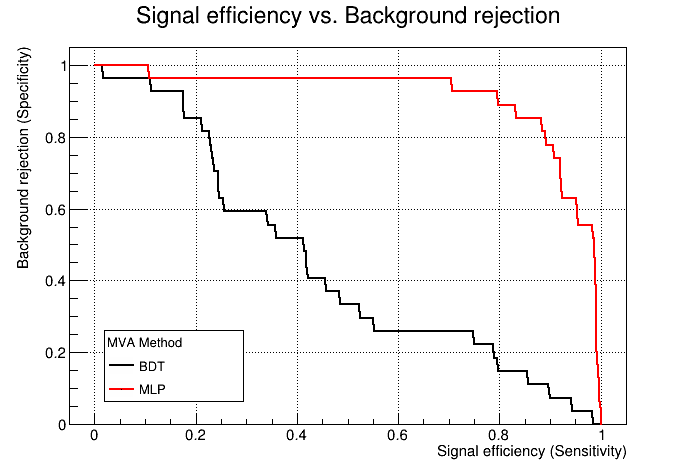

In [14]:
auto c1 = factory.GetROCCurve(loader);
c1->Draw();

We conclude that MLP classifier is better than BDT for this case. BDT is having troubles to differentiate the targets.

####  Close outputfile to save all output information (evaluation result of methods)

In [15]:
outputFile->Close();